# Assignment 16 (Neural Networks) Forest_Fires Dataset

## Q.  PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [4]:
# Loading the Dataset
forest_df = pd.read_csv("forestfires.csv")

In [5]:
# Copying the dataset in a new variable 
forest_df1 = forest_df.copy()

In [6]:
forest_df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,1,small


In [7]:
# Dropping the columns month and day 
forest_df1.drop(["month","day"],axis=1,inplace = True)

In [8]:
# Unique value counts of size_category column
forest_df1["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [9]:
# Checking for null values
forest_df1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
# Summary Statistics
forest_df1.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


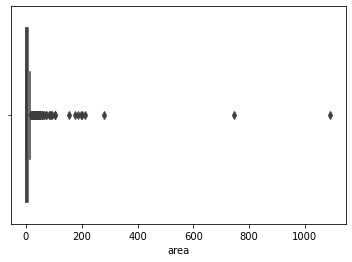

In [11]:
# Checking for Outliers
ax = sns.boxplot(forest_df1['area'])

## There are 3 Outlier Instances in this Data 

In [12]:
# Adjusting the rcParams for matplotlib
plt.rcParams["figure.figsize"] = 9,5

Skewness: 12.846933533934868
Kurtosis: 194.1407210942299


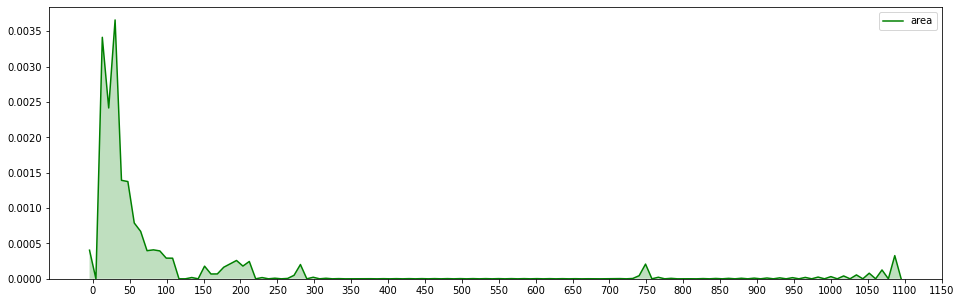

In [13]:
# Plotting the Kernel Density Estimation Plot
plt.figure(figsize=(16,5))
print("Skewness: {}".format(forest_df1['area'].skew()))
print("Kurtosis: {}".format(forest_df1['area'].kurtosis()))
ax = sns.kdeplot(forest_df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

## The Data is highly Skewed and has Large Kurtosis Value
## Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land 

In [14]:
forest_df2 = forest_df1[forest_df1.columns[0:10]]

In [15]:
num_columns = forest_df2.select_dtypes(exclude='object').columns.tolist()

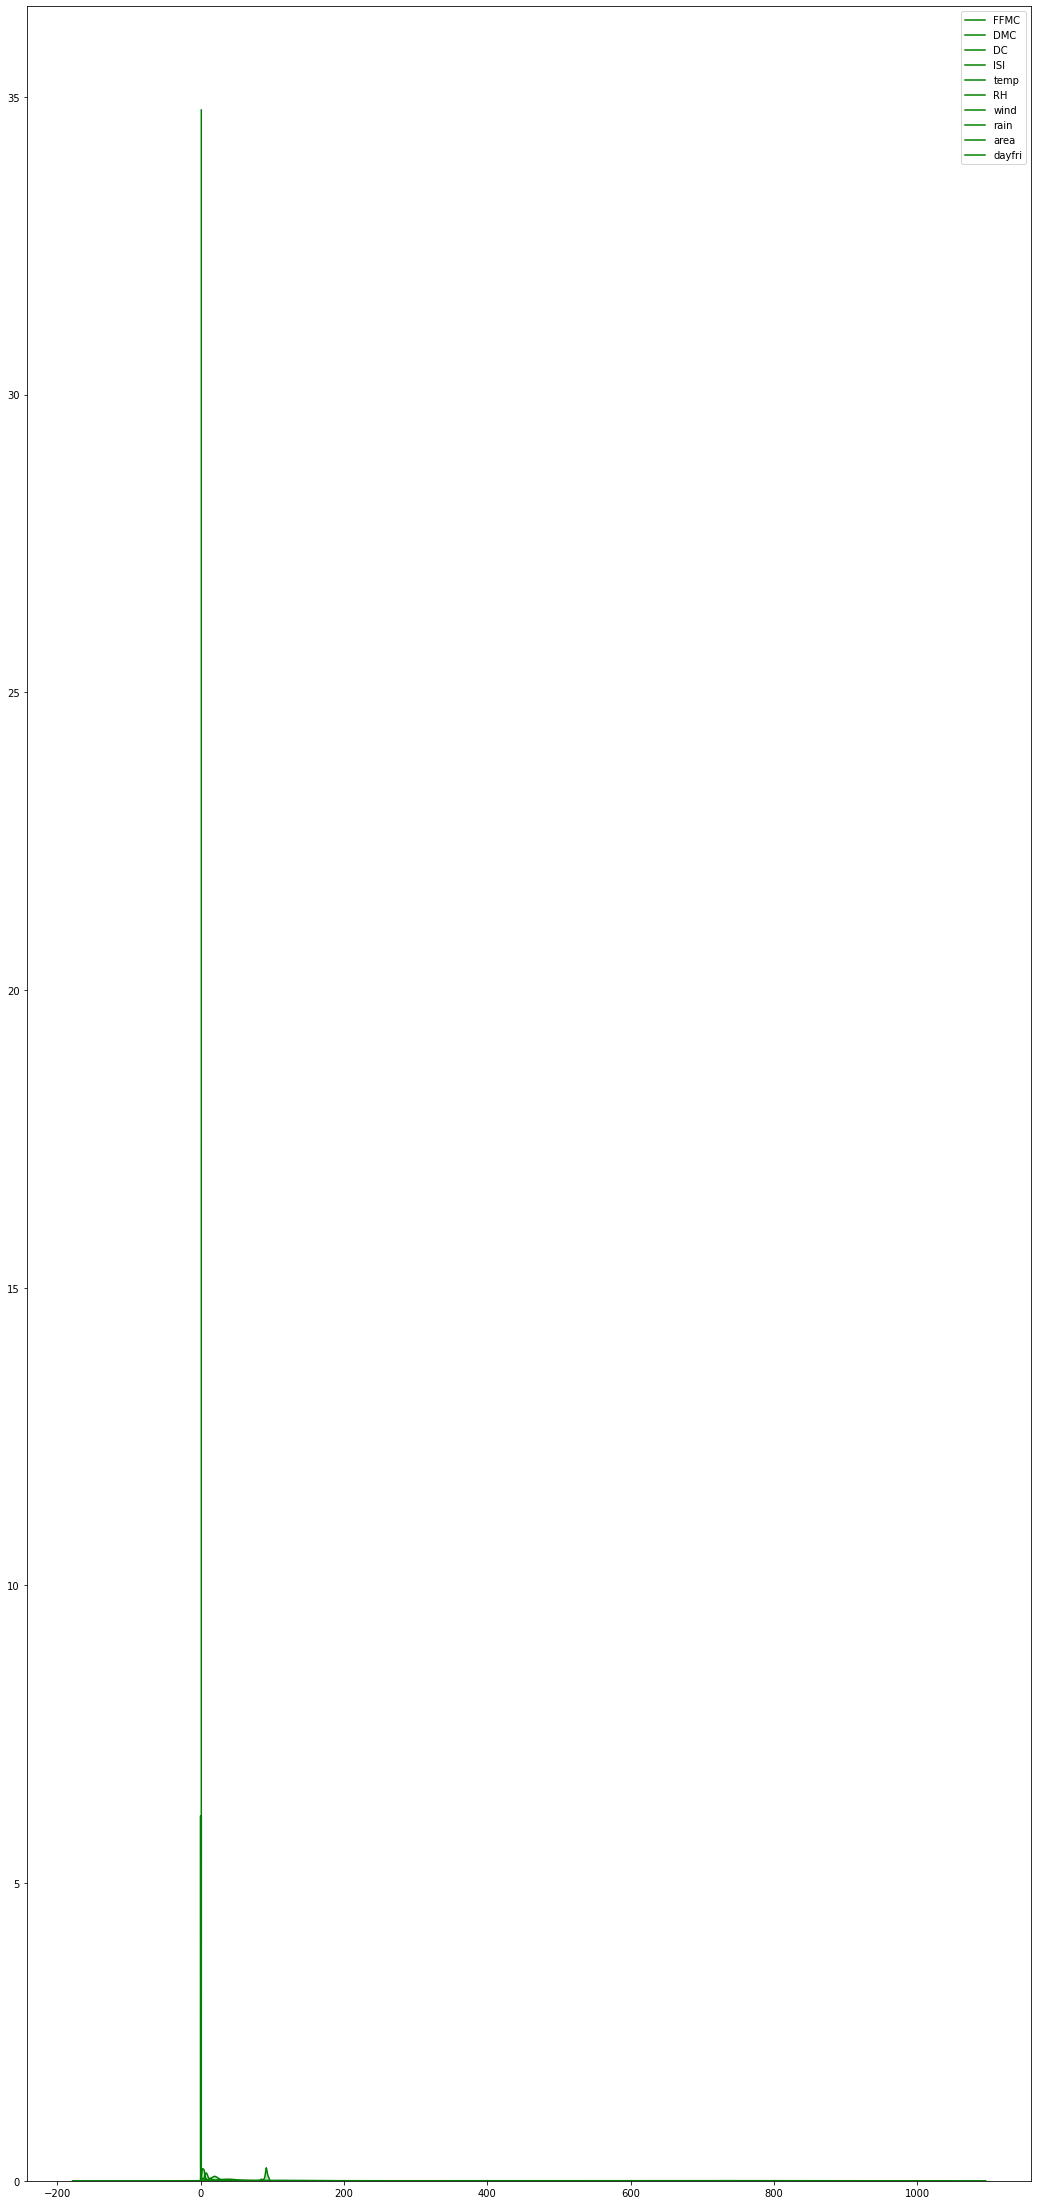

In [16]:
# Plotting Graphs
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.plot(8,4,i)
    sns.kdeplot(forest_df[col],color='g',shade=True)
plt.show()

In [17]:
# Calculating the skewness and kurtosis
num_data = forest_df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['Skewness','Kurtosis'])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri
Skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105
Kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265


## Correlation Analysis 

<AxesSubplot:>

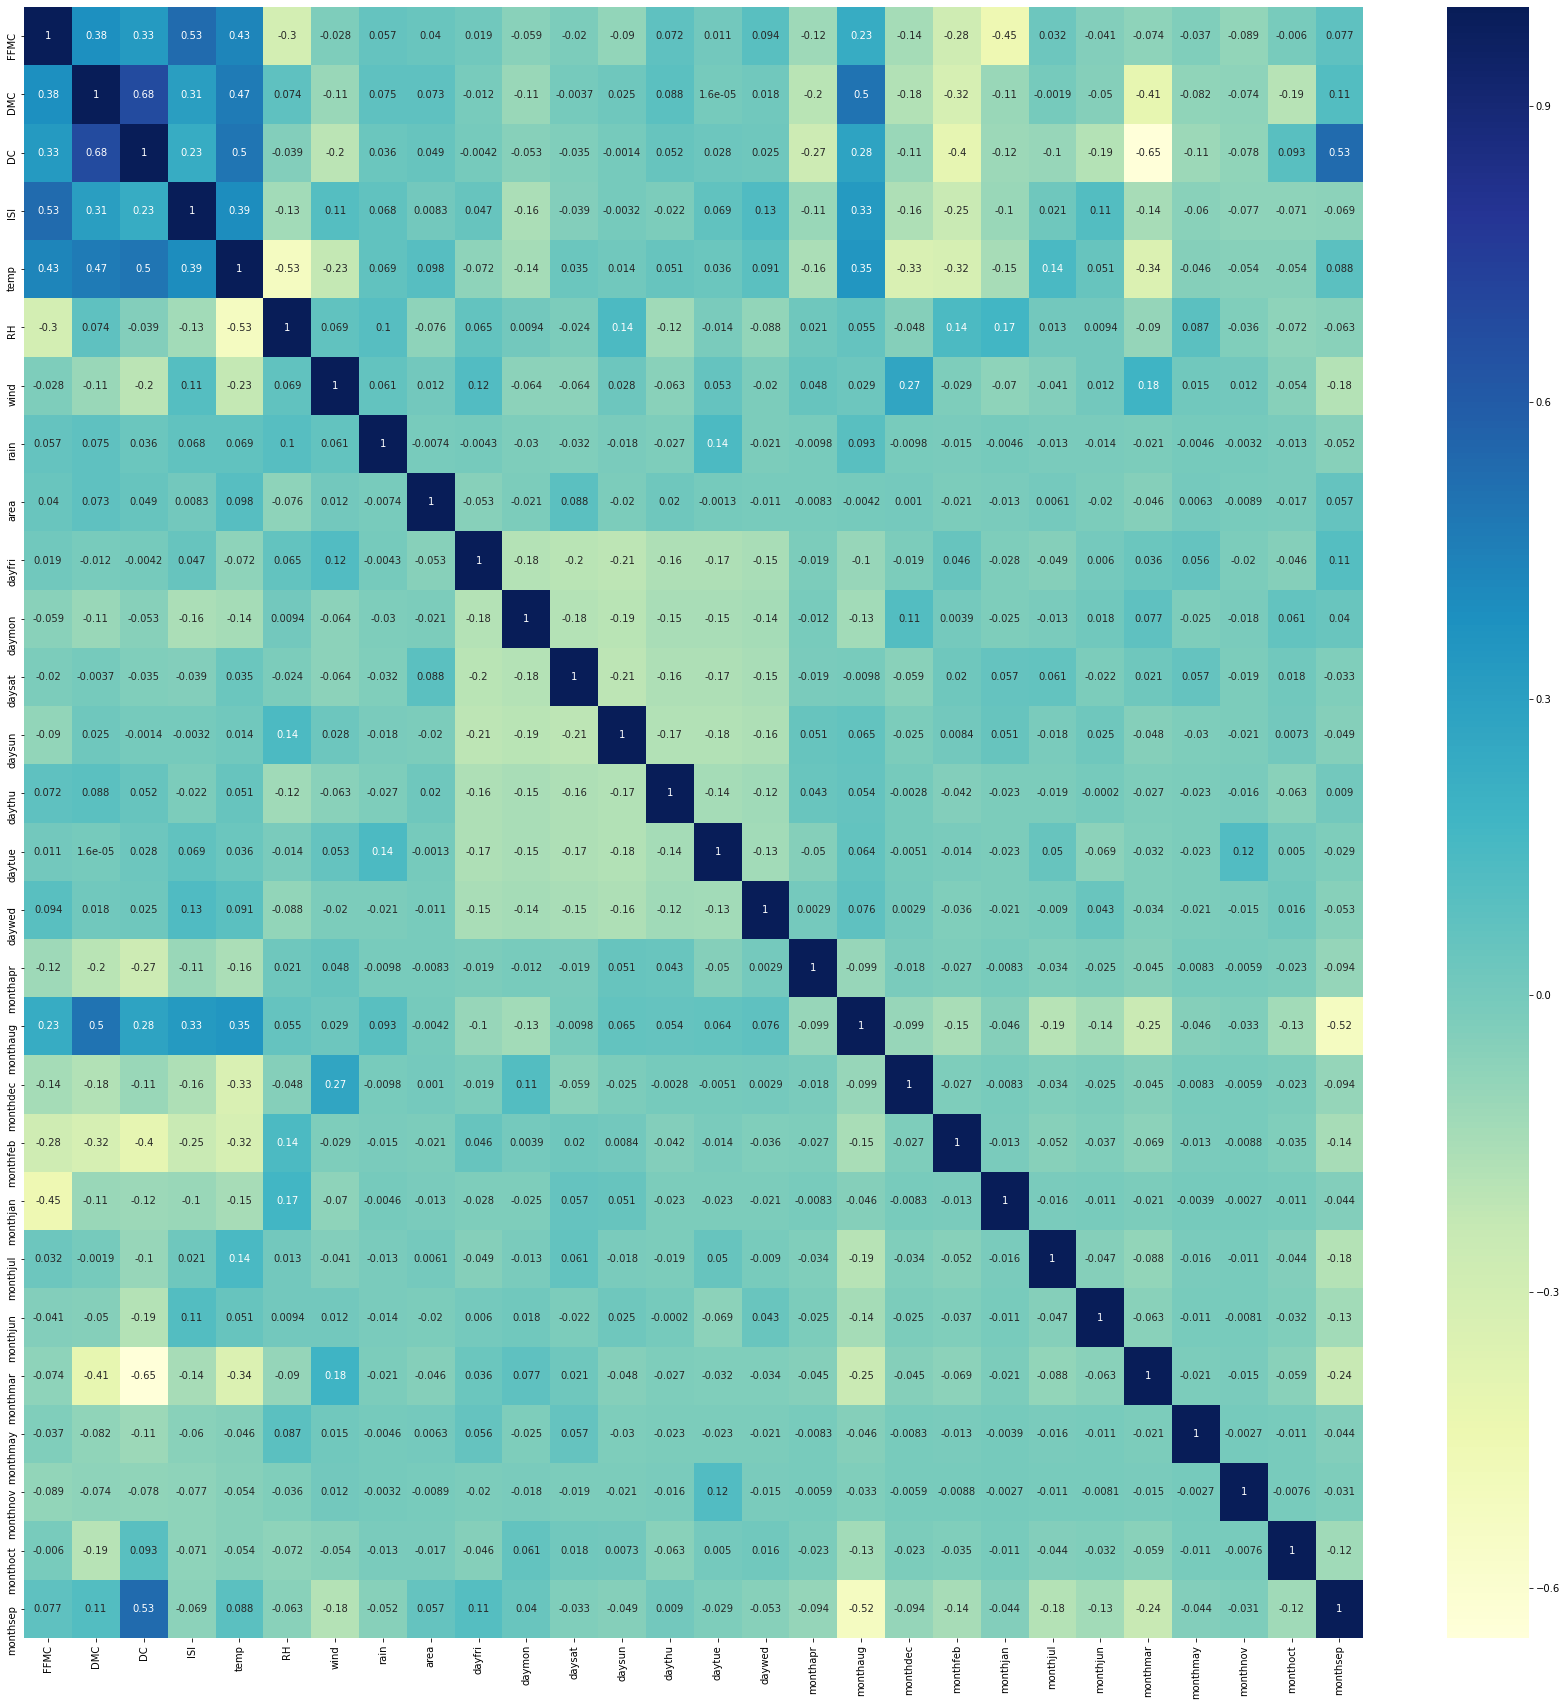

In [18]:
plt.figure(figsize=(30,30))
sns.heatmap(forest_df1.corr(),cmap='YlGnBu',annot=True)

## Neural Network Model

In [19]:
mapping = {'small': 1, 'large': 2}

In [20]:
forest_df1 = forest_df1.replace(mapping)

In [21]:
x = np.array(forest_df1.iloc[:,0:28])
y = np.array(forest_df1.iloc[:,28])

In [22]:
def norm_func(i):
    x1 = (i-i.min())/(i.max()-i.min())
    return (x1)

In [23]:
x_norm = norm_func(x)

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)

In [25]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
42/42 [==============================] - 31s 2ms/step - loss: 0.6974 - accuracy: 0.3622
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.7154
Epoch 3/150
42/42 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.7415
Epoch 4/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7449
Epoch 5/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.7278
Epoch 6/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7530
Epoch 7/150
42/42 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7110
Epoch 8/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7368
Epoch 9/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7575
Epoch 10/150
42/42 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.7580
Epoch 11

42/42 [==============================] - 0s 2ms/step - loss: -0.6950 - accuracy: 0.7307
Epoch 83/150
42/42 [==============================] - 0s 2ms/step - loss: -0.7068 - accuracy: 0.7304
Epoch 84/150
42/42 [==============================] - 0s 2ms/step - loss: -0.7678 - accuracy: 0.7128
Epoch 85/150
42/42 [==============================] - 0s 2ms/step - loss: -0.7400 - accuracy: 0.7263
Epoch 86/150
42/42 [==============================] - 0s 2ms/step - loss: -0.6482 - accuracy: 0.7612
Epoch 87/150
42/42 [==============================] - 0s 2ms/step - loss: -0.7379 - accuracy: 0.7340
Epoch 88/150
42/42 [==============================] - 0s 2ms/step - loss: -0.7702 - accuracy: 0.7268
Epoch 89/150
42/42 [==============================] - 0s 2ms/step - loss: -0.6333 - accuracy: 0.7755
Epoch 90/150
42/42 [==============================] - 0s 2ms/step - loss: -0.8343 - accuracy: 0.7126
Epoch 91/150
42/42 [==============================] - 0s 2ms/step - loss: -0.9540 - accuracy: 0.6774
Epo

In [28]:
# Calculating the accuracy
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy : %.2f' % (accuracy*100))

13/13 [==============================] - 1s 1ms/step - loss: -1.3759 - accuracy: 0.7312
Accuracy : 73.12


## Conclusion

In [29]:
predictions = model.predict_classes(x_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
for i in range(5):
    print('%s => %d (expected %d)' % (x[i].tolist(), predictions[i], y[i]))

[86.2, 26.2, 94.3, 5.1, 8.2, 51.0, 6.7, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[90.6, 35.4, 669.1, 6.7, 18.0, 33.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[90.6, 43.7, 686.9, 6.7, 14.6, 33.0, 1.3, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[91.7, 33.3, 77.5, 9.0, 8.3, 97.0, 4.0, 0.2, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[89.3, 51.3, 102.2, 9.6, 11.4, 99.0, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
